Import Libraries

In [211]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Load the Dataset

In [212]:
df = pd.read_csv("./data/linear.csv")
df.head()

,x,y
0,0.000000,-51.000000
1,25.000000,-12.000000
2,117.583220,134.907414
3,108.922466,134.085180
4,69.887445,NaN


Remove Missing or Impute Values

In [213]:
# Look at the shape of the dataframe
df.shape

(102, 2)

In [214]:
# There are missing values in the y column which is what we will predict
df.isnull().sum()

x    0
y    8
dtype: int64

In [215]:
# Remove entire row from dataframe
df = df.dropna(how="any")
df.shape

(94, 2)

Arrange Data into Features Matrix and Target Vector

In [216]:
# Convert x column to numpy array
X = df.loc[:, ['x']].values

## Feature Matrix needs to be at 2 dimensional
X.shape

(94, 1)

In [217]:
y = df.loc[:, 'y'].values
y.shape

(94,)

In [219]:
# Step 1 : Import model
from sklearn.linear_model import LinearRegression

# step 2 : Make an instance of the Model
reg = LinearRegression(fit_intercept=True)

# Step 3 : Training the model on the data, storing the information learned form the data
# Model is learning the relationship between x and y
reg.fit(X, y)

# Step 4 : Predict the values of new data. We are predicting for one observation
reg.predict(X[0].reshape(-1, 1))

array([-50.99119328])

In [220]:
X[0]

array([0.])

In [221]:
X[0].reshape(-1, 1)

array([[0.]])

In [ ]:
# Predict for Multiple observations at Once
reg.predict(X[0 : 10])

array([-50.99119328, -11.39905237, 135.223663  , 121.50775193,
       102.37289634,  31.0056196 ,   4.46431068,  74.84474012,
        20.82088826,  72.16749711])

Measuring Model Performance

In [ ]:
score = reg.score(X, y)
print(score)

0.979881836115762


After we fit an instance of a model in scikit-learn, you can use additional attributs.

In [ ]:
reg.coef_

array([1.58368564])

In [ ]:
reg.intercept_

-50.99119328333394

In [ ]:
m = reg.coef_
b = reg.intercept_

# following slope intercept form
print((m, b))

(array([1.58368564]), -50.99119328333394)


Plotting the best fit Linear Regression Line in Red

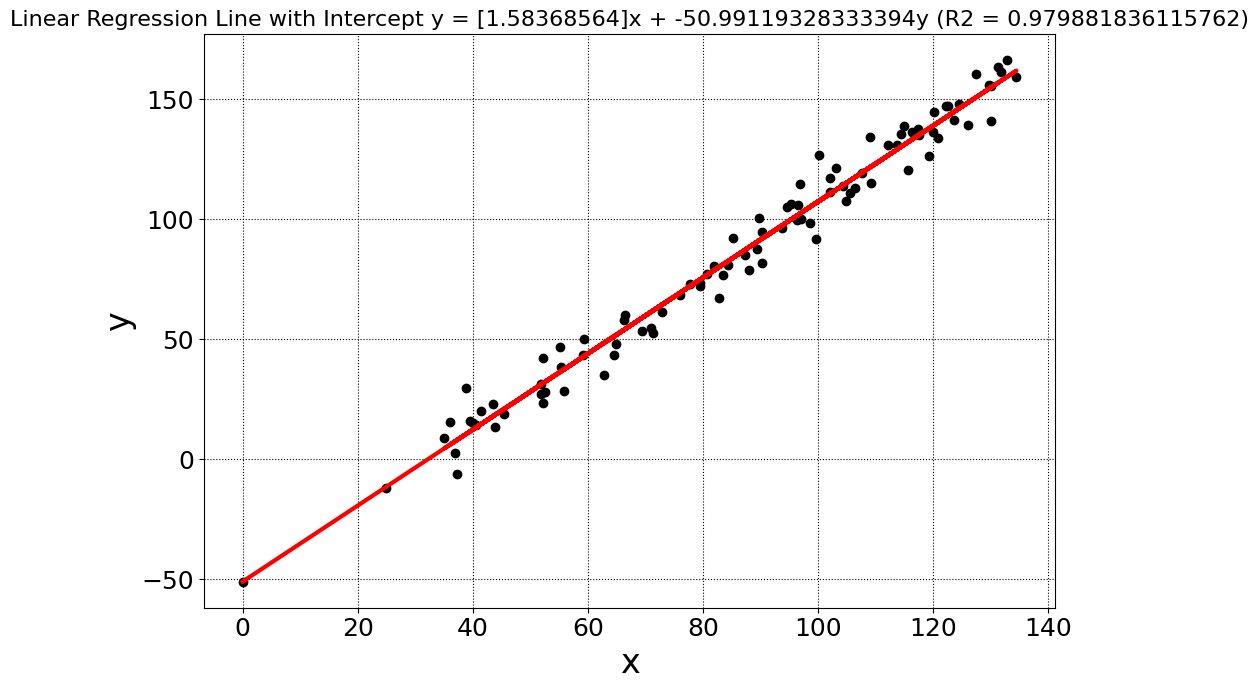

In [224]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10, 7))
ax.scatter(X, y, color='black')
ax.plot(X, reg.predict(X), color='red', linewidth=3)
ax.grid(True, axis='both', zorder = 0, linestyle=':', color='k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('x', fontsize= 24)
ax.set_ylabel('y', fontsize= 24)
ax.set_title(f"Linear Regression Line with Intercept y = {m}x + {b}y (R2 = {score})", fontsize = 16 )
fig.tight_layout()